# Homework 4

## Problem 4.1

The data set accompanying this homework gives daily returns for three stocks: TSLA, AAPL, and IBM (stored on GitHub repo).

(a) Calculate the historical (regressed, no intercept) beta, for each of these assets as of Dec 31, 2014. In each case, calculate the appropriate t-statistic on the coefficient to test the null hypothesis $\beta=0$ and state whether you reject the null hypothesis.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_r = pd.read_csv(
    "https://raw.githubusercontent.com/cskksdfklpz/database/main/AAPL_IBM_TSLA.txt",
    sep="|",
)
df_r.info(verbose=True, show_counts=True)
df_r

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    19656 non-null  object 
 1   TICKER  19656 non-null  object 
 2   RM      19656 non-null  float64
 3   R       14490 non-null  float64
dtypes: float64(2), object(2)
memory usage: 614.4+ KB


,DATE,TICKER,RM,R
0,1990-01-02,IBM,0.017799,0.041169
1,1990-01-03,IBM,-0.002586,0.008929
2,1990-01-04,IBM,-0.008613,0.011378
3,1990-01-05,IBM,-0.009756,-0.002500
4,1990-01-08,IBM,0.004514,0.006266
...,...,...,...,...
19651,2015-12-23,TSLA,0.012418,-0.001087
19652,2015-12-24,TSLA,-0.001599,0.003788
19653,2015-12-28,TSLA,-0.002179,-0.007026
19654,2015-12-29,TSLA,0.010630,0.035990


In [12]:
df_r.loc[df_r['TICKER'] == 'AAPL'].dropna()

,DATE,TICKER,RM,R
6552,1990-01-02,AAPL,0.017799,0.056738
6553,1990-01-03,AAPL,-0.002586,0.006711
6554,1990-01-04,AAPL,-0.008613,0.003333
6555,1990-01-05,AAPL,-0.009756,0.003322
6556,1990-01-08,AAPL,0.004514,0.006623
...,...,...,...,...
13099,2015-12-23,AAPL,0.012418,0.012870
13100,2015-12-24,AAPL,-0.001599,-0.005340
13101,2015-12-28,AAPL,-0.002179,-0.011201
13102,2015-12-29,AAPL,0.010630,0.017974


                                 OLS Regression Results                                
Dep. Variable:                      R   R-squared (uncentered):                   0.332
Model:                            OLS   Adj. R-squared (uncentered):              0.332
Method:                 Least Squares   F-statistic:                              3133.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                        0.00
Time:                        15:32:03   Log-Likelihood:                          17657.
No. Observations:                6301   AIC:                                 -3.531e+04
Df Residuals:                    6300   BIC:                                 -3.531e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

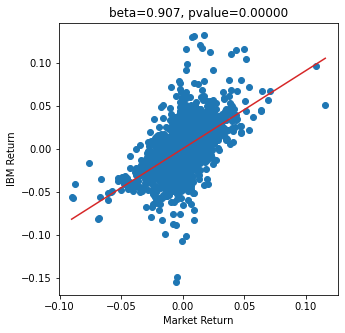

                                 OLS Regression Results                                
Dep. Variable:                      R   R-squared (uncentered):                   0.192
Model:                            OLS   Adj. R-squared (uncentered):              0.192
Method:                 Least Squares   F-statistic:                              1500.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                   1.61e-294
Time:                        15:32:03   Log-Likelihood:                          13915.
No. Observations:                6301   AIC:                                 -2.783e+04
Df Residuals:                    6300   BIC:                                 -2.782e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

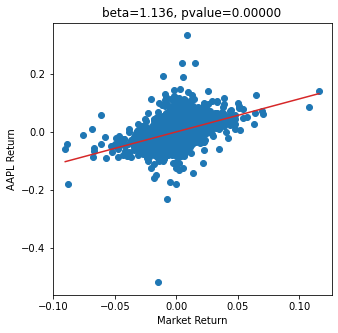

                                 OLS Regression Results                                
Dep. Variable:                      R   R-squared (uncentered):                   0.122
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              157.4
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                    6.51e-34
Time:                        15:32:03   Log-Likelihood:                          2219.2
No. Observations:                1135   AIC:                                     -4436.
Df Residuals:                    1134   BIC:                                     -4431.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

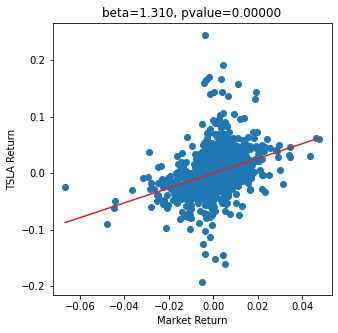

In [22]:
def regression(df, ticker="IBM", end_date="2014-12-31", verbose=True, plot=True):
    
    df_ticker = df.loc[df['TICKER'] == ticker]
    df_ticker.index = pd.to_datetime(df_ticker['DATE'])
    Xy = df_ticker.dropna(inplace=False)
    data = Xy[["RM", "R"]].loc[:end_date]
    RM = data["RM"]
    R = data["R"]
    
    mod = sm.OLS(R, RM)
    res = mod.fit()
    beta = res.params.values[0]
    pvalue = res.pvalues.values[0]
    if verbose:
        print(res.summary())
    if plot:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.scatter(RM, R, color="tab:blue", label="scatter")
        ax.set_xlabel("Market Return")
        ax.set_ylabel("{} Return".format(ticker))
        x = sorted(RM)
        y = res.predict(x)
        ax.plot(x, y, color="tab:red", label="regression")
        ax.set_title("beta={:.3f}, pvalue={:.5f}".format(beta, pvalue))
        plt.show()

    return beta, pvalue


beta_IMB, _ = regression(df=df_r, ticker="IBM")
beta_AAPL, _ = regression(df=df_r, ticker="AAPL")
beta_TSLA, _ = regression(df=df_r, ticker="TSLA")

The pvalue are all below 0.05, indicating we can reject the null hypothesis $\beta=0$. So the beta is

* beta of IBM is 0.907
* beta of AAPL is 1.36
* beta of TSLA is 1.31

(b) Compute the holdings vector $\mathbf{h} \in \mathbb{R}^3$ for the unique portfolio of TSLA, AAPL, and IBM which is dollar-neutral (ie. self-financing) and which has holding of 100 dollars in AAPL and zero exposure to beta as of Dec 31, 2014. In other words $\mathbf{h}\cdot\beta = 0$ where $\beta$ is the vector of betas computed in part (a).

In [23]:
import numpy as np

A = np.matrix([[1, 1, 1], [0, 1, 0], [beta_IMB, beta_AAPL, beta_TSLA]])
b = np.matrix("0;100;0")

h = np.linalg.inv(A) * b
print(h)

[[-43.08561394]
 [100.        ]
 [-56.91438606]]


The holding is
* short 43.08 dollars in IBM
* long 100 dollars in AAPL
* short 56.91 dollars in TSLA

(c) Compute the daily returns of the portfolio from (b) over the period Jan 1, 2015 to Dec 31, 2015. Assume that each day, the portfolio is rebalanced back to the initial holdings vector $h \in \mathbb{R}^3$. Plot the cumulative sum of the log returns.

Text(0, 0.5, 'Cumulative sum of the log returns')

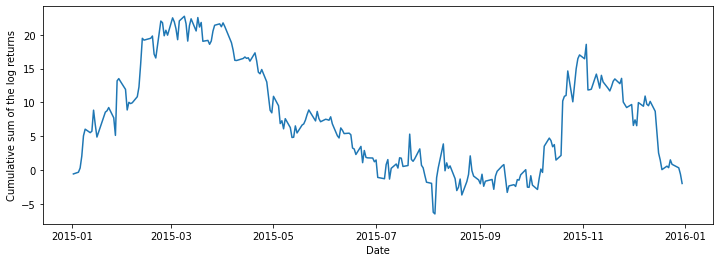

In [24]:
R = df_r.groupby("DATE").apply(lambda x: (x["R"].values * h).item(0))
R.index = pd.to_datetime(R.index)
R = R.loc["2015-01-01":"2015-12-31"]
PL = R.cumsum()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(PL)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative sum of the log returns")

(d) Compute the realized correlation of the returns in part (c) to the market’s return, using the S&P 500 as a proxy for the market portfolio. Construct a statistical test of the null hypothesis that the correlation is zero. Is the realized correlation significantly different from zero at the 95% level?

In [25]:
import yfinance as yf
from scipy import stats

data_SP500 = yf.download("^GSPC", start="2014-12-31", end="2015-12-31")
RM = data_SP500["Adj Close"].pct_change().dropna()
r, p = stats.pearsonr(R, RM)
print("The correlation coefficient is {}".format(r))
print("The p-value if the t-test is {}".format(p))
if p > 0.05:
    print(
        "Since p-value is greater than 5%,"
        "the realized correlation is not"
        "significantly different from 0 at the 95% level"
    )
else:
    print(
        "Since p-value is less than 5%,"
        "the realized correlation is indeed"
        "significantly different from 0 at the 95% level"
    )

[*********************100%***********************]  1 of 1 completed
The correlation coefficient is 0.02919545682839322
The p-value if the t-test is 0.6452776657810241
Since p-value is greater than 5%,the realized correlation is notsignificantly different from 0 at the 95% level


## Problem 4.2

$$
\newcommand{\E}{\mathbb{E}}
\newcommand{\Var}{\mathrm{Var}}
\newcommand{\Cov}{\mathrm{Cov}}
$$

(a) We first compute the expectation of the fund's return

$$
\E[h'r] = \frac{1}{n}\sum_{i=1}^n \E[r_i] = \frac{1}{n}\sum_{i=1}^n\E[\beta r_M+\epsilon_i] = \beta\E[r_M]+\frac{1}{n}\sum_{i=1}^n\E[\epsilon_i]
$$

Then we compute the variance

$$
\Var[h'r] = \frac{1}{n^2}\Var\left[\sum_{i=1}^n r_i\right] 
= \frac{1}{n^2}\left[\sum_{i=1}^n\Var[r_i]+\sum_{i\neq j}\Cov(r_i, r_j)\right]
$$

where

$$
\Var[r_i] = \Var(\beta r_M+\epsilon_i) = \beta^2\sigma_M^2+\sigma_i^2
$$

and for $i\neq j$

$$
\Cov(r_i, r_j) = \Cov(\beta r_M+\epsilon_i, \beta r_M + \epsilon_j) = \beta^2\Cov(r_M, r_M) = \beta^2\sigma_M^2
$$

Thus we have

$$
\begin{aligned}
\Var[h'r] &= \frac{1}{n^2}\left[\sum_{i=1}^n\Var[r_i]+\sum_{i\neq j}\Cov(r_i, r_j)\right]\\
          &= \frac{1}{n^2}\left[\sum_{i=1}^n(\beta^2\sigma_M^2+\sigma_i^2)+\beta^2\sigma_M^2\cdot(n^2-n)\right]\\
          &= \beta^2\sigma_M^2 + \frac{1}{n^2}\sum_{i=1}^n\sigma_i^2\\
          &= f(\beta, \sigma_M^2) + g(\sigma_1^2,\dots,\sigma_n^2)
\end{aligned}
$$

where

$$
f(\beta, \sigma_M^2) = \beta^2\sigma_M^2,\quad g(\sigma_1^2,\dots,\sigma_n^2) = \frac{1}{n^2}\sum_{i=1}^n\sigma_i^2
$$

(b) see the code below

f = 0.010, g = 0.000450
f = 0.010, g = 0.000300
f = 0.010, g = 0.000225
f = 0.010, g = 0.000180
f = 0.010, g = 0.000150
f = 0.010, g = 0.000129
f = 0.010, g = 0.000112
f = 0.010, g = 0.000100
f = 0.010, g = 0.000090
f = 0.010, g = 0.000082
f = 0.010, g = 0.000075
f = 0.010, g = 0.000069
f = 0.010, g = 0.000064
f = 0.010, g = 0.000060
f = 0.010, g = 0.000056
f = 0.010, g = 0.000053
f = 0.010, g = 0.000050
f = 0.010, g = 0.000047
f = 0.010, g = 0.000045
f = 0.010, g = 0.000043
f = 0.010, g = 0.000041
f = 0.010, g = 0.000039
f = 0.010, g = 0.000037
f = 0.010, g = 0.000036
f = 0.010, g = 0.000035
f = 0.010, g = 0.000033
f = 0.010, g = 0.000032
f = 0.010, g = 0.000031
f = 0.010, g = 0.000030


Text(0, 0.5, 'variance explained by the market')

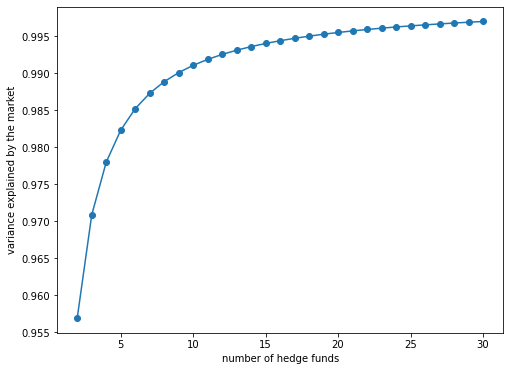

In [34]:
def f(beta, sigma_M, n):
    return beta * beta * sigma_M * sigma_M


def g(sigma, n):
    return (sigma ** 2) / n


var_explained = []
ns = []
beta = 0.5
sigma_M = 0.2
sigma_i = 0.03
for n in range(2, 31):
    ns.append(n)
    fn = f(beta, sigma_M, n)
    gn = g(sigma_i, n)
    print('f = {:.3f}, g = {:.6f}'.format(fn, gn))
    var_explained.append(fn / (fn + gn))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ns, var_explained, "o-")
ax.set_xlabel("number of hedge funds")
ax.set_ylabel("variance explained by the market")

The variance ratio is close to 1 when we have more hedge funds

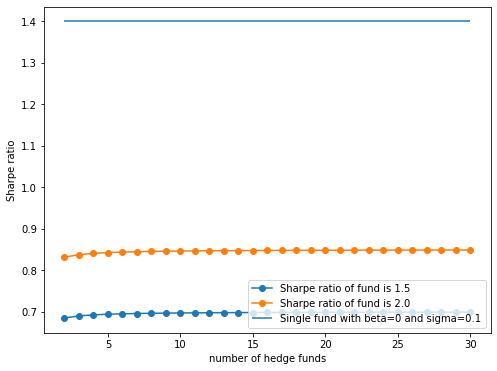

In [35]:
def E(beta, ERM, ER):
    return beta * ERM + ER


def Var(beta, sigma_M, sigma, n):
    return f(beta, sigma_M, n) + g(sigma, n)


SPs1 = []
SPs2 = []
for n in range(2, 31):
    SP1 = (E(beta=beta, ERM=0.07, ER=1.5 * sigma_i) - 0.01) / np.sqrt(
        Var(beta, sigma_M, sigma_i, n)
    )
    SPs1.append(SP1)

    SP2 = (E(beta=beta, ERM=0.07, ER=2.0 * sigma_i) - 0.01) / np.sqrt(
        Var(beta, sigma_M, sigma_i, n)
    )
    SPs2.append(SP2)

SP = (E(beta=0, ERM=0.07, ER=1.5 * 0.1) - 0.01) / np.sqrt(
    Var(beta=0, sigma_M=sigma_M, sigma=0.1, n=1)
)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ns, SPs1, "o-", label="Sharpe ratio of fund is 1.5")
ax.plot(ns, SPs2, "o-", label="Sharpe ratio of fund is 2.0")
ax.hlines(y=SP, xmin=2, xmax=30, label="Single fund with beta=0 and sigma=0.1")
ax.set_xlabel("number of hedge funds")
ax.set_ylabel("Sharpe ratio")
ax.legend(loc="lower right")

The sharpe ratio will increase if the Sharpe ratio of $\epsilon_i$ is larger.

(d) It's better since the Sharpe ratio is larger. Since the market portfolio have a very low sharpe ratio, letting $\beta=0$ will make the portfolio's Sharpe ratio close to the single fund's one (1.5)